In [2]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [13]:
IMAGE_SHAPE = (224, 224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])


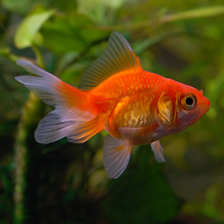

In [14]:
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [15]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [16]:
gold_fish

array([[[0.28235294, 0.33333333, 0.07058824],
        [0.31372549, 0.37254902, 0.09019608],
        [0.34901961, 0.41960784, 0.11764706],
        ...,
        [0.32941176, 0.39215686, 0.00392157],
        [0.32156863, 0.38431373, 0.00392157],
        [0.30980392, 0.36862745, 0.        ]],

       [[0.28627451, 0.33333333, 0.08235294],
        [0.3254902 , 0.38039216, 0.10980392],
        [0.35294118, 0.42352941, 0.12941176],
        ...,
        [0.32156863, 0.38039216, 0.00392157],
        [0.31372549, 0.37254902, 0.00392157],
        [0.30196078, 0.36078431, 0.        ]],

       [[0.28627451, 0.33333333, 0.08627451],
        [0.31372549, 0.36862745, 0.10196078],
        [0.34509804, 0.41568627, 0.12941176],
        ...,
        [0.31764706, 0.37647059, 0.00392157],
        [0.30980392, 0.36862745, 0.00784314],
        [0.29803922, 0.35686275, 0.00392157]],

       ...,

       [[0.05490196, 0.10980392, 0.01568627],
        [0.05098039, 0.11372549, 0.01960784],
        [0.05098039, 0

In [17]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [18]:
result=classifier.predict(gold_fish[np.newaxis,...])
result.shape

(1, 1001)

In [19]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [21]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [22]:
image_labels[predicted_label_index]


'goldfish'

In [24]:
#Load flowers dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [25]:
data_dir

'./datasets/flower_photos'

In [26]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [27]:
list(data_dir.glob('*/*.jpg'))[:5]


[PosixPath('datasets/flower_photos/roses/1667199972_7ba7d999c1_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5249439791_196b4e7fc7.jpg'),
 PosixPath('datasets/flower_photos/roses/9320934277_4fb95aef5d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1775233884_12ff5a124f.jpg'),
 PosixPath('datasets/flower_photos/roses/6363976189_e7155e5f9c.jpg')]

In [28]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [29]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [30]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/1667199972_7ba7d999c1_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5249439791_196b4e7fc7.jpg'),
 PosixPath('datasets/flower_photos/roses/9320934277_4fb95aef5d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1775233884_12ff5a124f.jpg'),
 PosixPath('datasets/flower_photos/roses/6363976189_e7155e5f9c.jpg')]

In [31]:
str(flowers_images_dict['roses'][0])


'datasets/flower_photos/roses/1667199972_7ba7d999c1_m.jpg'

In [32]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [33]:
img.shape


(240, 180, 3)

In [35]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [37]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(IMAGE_SHAPE))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [38]:
X = np.array(X)
y = np.array(y)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [41]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

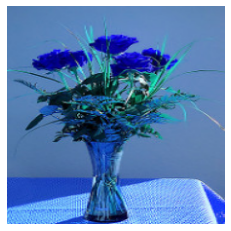

In [42]:
plt.axis('off')
plt.imshow(X[0])

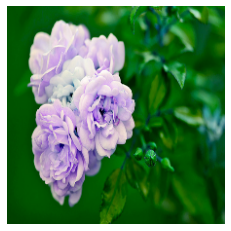

In [44]:
plt.axis('off')
plt.imshow(X[1])

In [46]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

In [47]:

predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([795, 722, 412])

In [49]:
image_labels[880]


'umbrella'

In [50]:
#pre-trained model and retrain it using flowers images
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [51]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [52]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 77s 844ms/step - loss: 0.8312 - acc: 0.6853
Epoch 2/5
86/86 [==============================] - 73s 848ms/step - loss: 0.4106 - acc: 0.8626
Epoch 3/5
86/86 [==============================] - 73s 847ms/step - loss: 0.3199 - acc: 0.8932
Epoch 4/5
86/86 [==============================] - 73s 846ms/step - loss: 0.2674 - acc: 0.9190
Epoch 5/5
86/86 [==============================] - 73s 849ms/step - loss: 0.2315 - acc: 0.9317


In [54]:
model.evaluate(X_test_scaled,y_test)


29/29 [==============================] - 25s 842ms/step - loss: 0.3819 - acc: 0.8660


[0.381930947303772, 0.8660130500793457]

In [61]:
pred=model.predict(X_test_scaled)
pred

array([[-2.2280226 ,  4.5964003 , -2.6633615 , -0.73135424, -2.3582835 ],
       [ 1.5929444 , -4.6748967 , -1.9507045 , -3.3495066 ,  0.21663064],
       [-2.4770846 , -1.360672  ,  2.7998211 ,  1.8933058 , -2.760459  ],
       ...,
       [-4.3489513 , -2.658313  , -0.84880495,  4.7113533 , -3.7156966 ],
       [ 2.5660076 , -7.1623473 , -5.276683  , -1.6424086 , -0.22308517],
       [-2.7621148 , -2.9154592 , -1.0794529 ,  2.4135182 , -3.0396926 ]],
      dtype=float32)

In [57]:
classes = [np.argmax(element) for element in pred]
classes[:5]

[2, 1, 2, 3, 1]

In [59]:
y_test[:5]


array([1, 0, 2, 4, 2])